<a href="https://colab.research.google.com/github/Akshara2326/Diamond_analysis/blob/main/Diamond_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Data Description:
          Unnamed: 0         carat           cut         color       clarity  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940      2.553003      2.594197      3.835150   
std    15571.281097      0.474011      1.027708      1.701105      1.724591   
min        1.000000      0.200000      0.000000      0.000000      0.000000   
25%    13485.750000      0.400000      2.000000      1.000000      2.000000   
50%    26970.500000      0.700000      2.000000      3.000000      4.000000   
75%    40455.250000      1.040000      3.000000      4.000000      5.000000   
max    53940.000000      5.010000      4.000000      6.000000      7.000000   

              depth         table         price             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean      61.749405     57.457184   3932.799722      5.731157      5.734526   
std        1.432621      2.2344

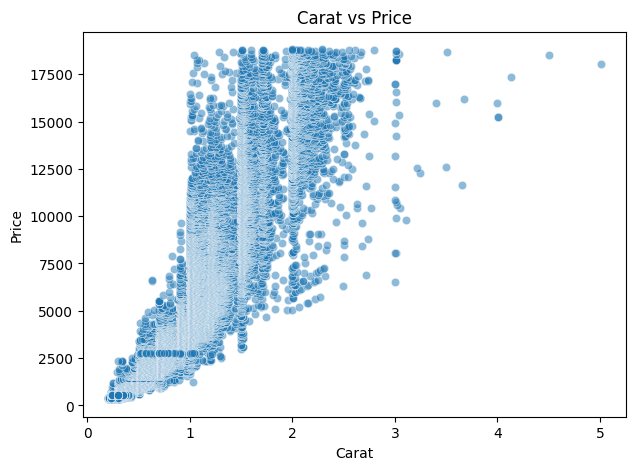

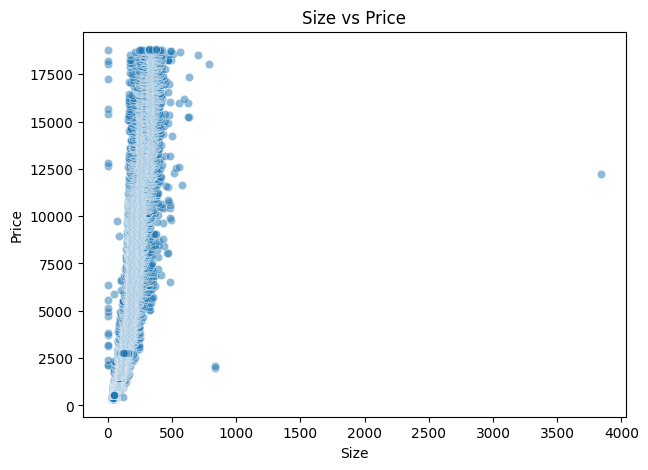

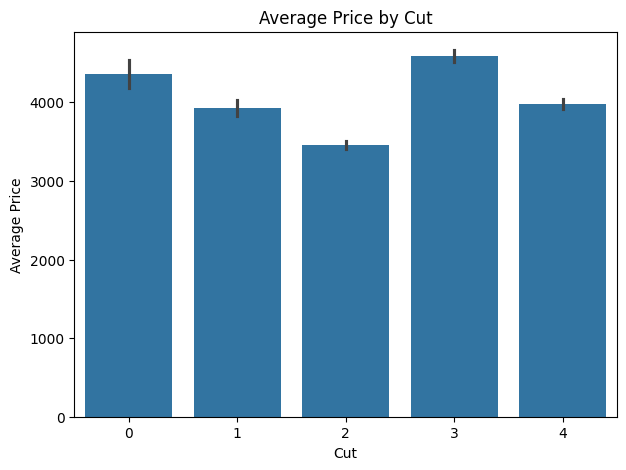

/tmp/ipython-input-3-1018101514.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color', y='price', data=data, estimator=np.mean, palette="viridis")


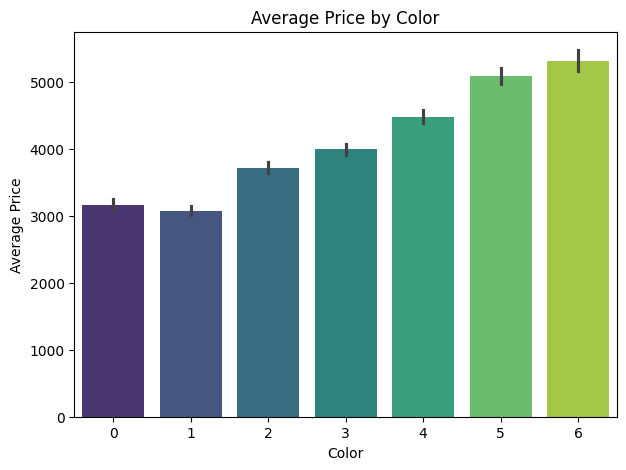

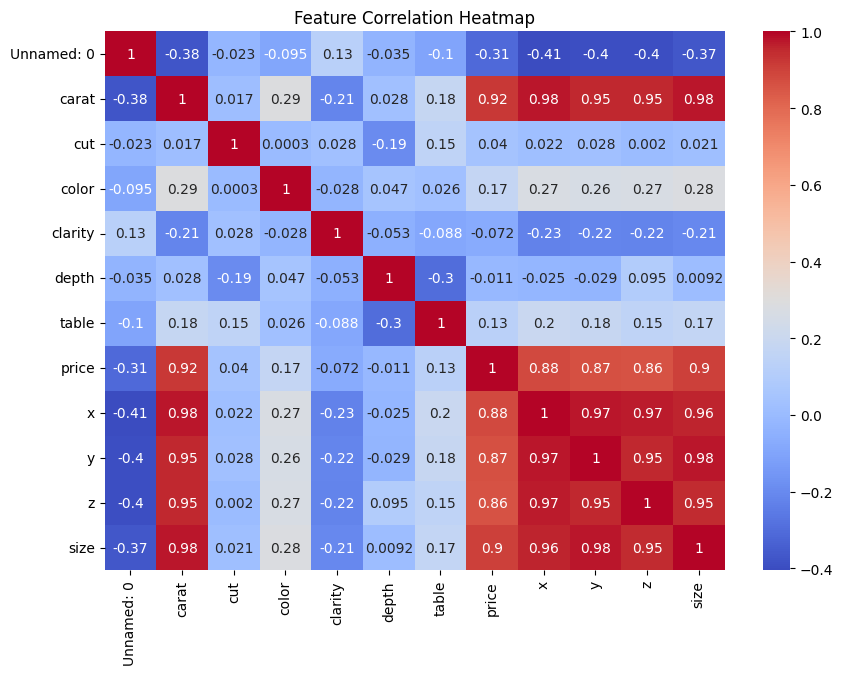


Linear Regression Results:
MSE:  1807689.906474609
MAE:  858.8973631194324
R2:  0.8862860785083944


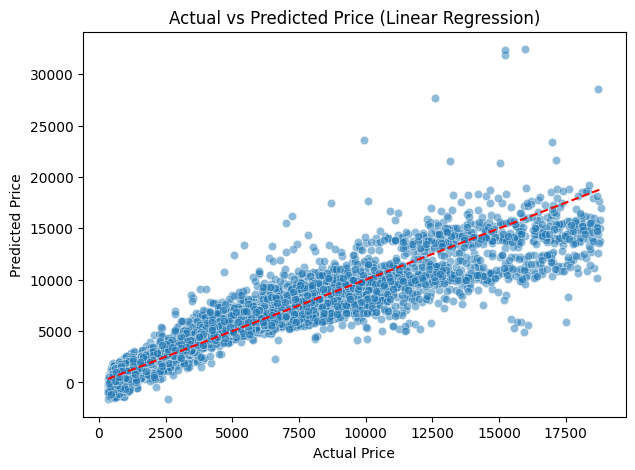


Feature Impact on Price (Linear Regression Coefficients):

       Feature  Coefficient
1        carat  9767.060182
4      clarity   284.344074
2          cut    76.183504
10        size     7.951926
0   Unnamed: 0     0.006640
6        table   -90.180671
5        depth  -129.683965
9            z  -235.991092
3        color  -269.939172
8            y  -411.649593
7            x  -575.840051


In [3]:
#DIAMOND ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Load Dataset
data = pd.read_csv("diamonds.csv")

#Remove Missing Values
data.dropna(inplace=True)

#Calculate 'size' column (volume)
data['size'] = data['x'] * data['y'] * data['z']

#Encode Categorical Columns
le = LabelEncoder()
for col in ['cut', 'color', 'clarity']:
    data[col] = le.fit_transform(data[col])

#Data Description & Correlation
print("\nData Description:\n", data.describe())
print("\nCorrelation with Price:\n", data.corr()['price'].sort_values(ascending=False))

# Carat vs Price
plt.figure(figsize=(7,5))
sns.scatterplot(x='carat', y='price', data=data, alpha=0.5)
plt.title("Carat vs Price")
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# Size vs Price
plt.figure(figsize=(7,5))
sns.scatterplot(x='size', y='price', data=data, alpha=0.5)
plt.title("Size vs Price")
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

# Average Price by Cut
plt.figure(figsize=(7,5))
sns.barplot(x='cut', y='price', data=data, estimator=np.mean)
plt.title("Average Price by Cut")
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.show()

# Average Price by Color
plt.figure(figsize=(7,5))
sns.barplot(x='color', y='price', data=data, estimator=np.mean, palette="viridis")
plt.title("Average Price by Color")
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#Prepare Data for Model
X = data.drop('price', axis=1)
y = data['price']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Results:")
print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)

#Actual vs Predicted Scatter Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#Coefficients Analysis
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Impact on Price (Linear Regression Coefficients):\n")
print(coeff_df.sort_values(by='Coefficient', ascending=False))